In [ ]:
import os
import pandas as pd
import sys
import numpy as np
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
drive.flush_and_unmount()
import warnings
warnings.simplefilter(action="ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


Drive not mounted, so nothing to flush and unmount.


In [ ]:
if __name__=="__main__":
  print("Program starts Here")
  if not os.path.exists("/content/drive"):
    drive.mount('/content/drive')
  Root = "/content/drive"
  print("Connection established with the google drive")

Program starts Here
Mounted at /content/drive
Connection established with the google drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
config = {
"new_data_set_path" : "/content/drive/MyDrive/dm assignments/Grocery_Items_50.csv",
"Image_data_set_path": "/content/drive/MyDrive/dm assignments/Alter/",
"min_support_value":[0.001, 0.005, 0.01, 0.05],
"min_confidence_value":[0.05, 0.075, 0.1]
}


In [ ]:
new_data_set_df = pd.read_csv(config["new_data_set_path"])
new_data_set_df = new_data_set_df.fillna("-")
te = TransactionEncoder()
t_ary = te.fit_transform(new_data_set_df.values.tolist())
final_formatted_df = pd.DataFrame(t_ary, columns=te.columns_)

In [ ]:
final_formatted_df

,-,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7996,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7997,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7998,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
final_formatted_df = final_formatted_df.drop(["-"],axis=1)

In [ ]:
frequent_itemset = apriori(final_formatted_df,min_support=0.01,use_colnames=True)
filtered_rules = association_rules(frequent_itemset,metric="confidence",min_threshold=.1)

In [ ]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(other vegetables),0.11225,0.124750,0.012125,0.108018,0.865874,-0.001878,0.981242,-0.148565
1,(soda),(other vegetables),0.09875,0.124750,0.010500,0.106329,0.852338,-0.001819,0.979387,-0.161233
2,(other vegetables),(whole milk),0.12475,0.153875,0.014250,0.114228,0.742346,-0.004946,0.955241,-0.283950
3,(rolls/buns),(whole milk),0.11225,0.153875,0.012250,0.109131,0.709221,-0.005022,0.949775,-0.315930
4,(soda),(whole milk),0.09875,0.153875,0.012000,0.121519,0.789725,-0.003195,0.963168,-0.228060
5,(yogurt),(whole milk),0.08575,0.153875,0.010875,0.126822,0.824189,-0.002320,0.969018,-0.189181


In [ ]:
rules_fetched = []
for s_value in config["min_support_value"]:
  intrim_result =[]
  frequent_itemset = apriori(final_formatted_df,min_support=s_value,use_colnames=True)
  for conf_value in config["min_confidence_value"]:
    filtered_rules = association_rules(frequent_itemset,metric="confidence",min_threshold=conf_value)
    intrim_result.append(len(filtered_rules))
  rules_fetched.append(intrim_result)

Text(0.5, 23.52222222222222, 'Minimum Support Value')

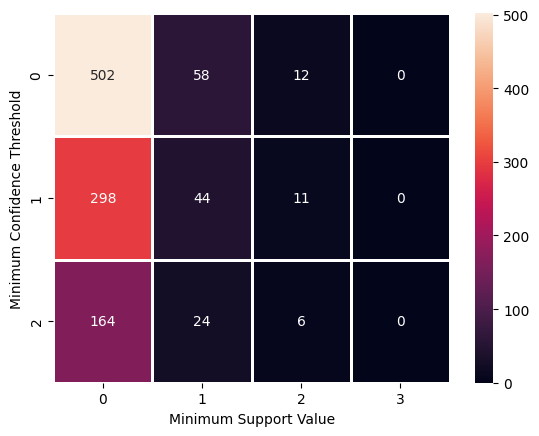

In [ ]:
sns.heatmap(np.array(rules_fetched).T,annot=True,linewidths=1,fmt='d')
plt.ylabel('Minimum Confidence Threshold')
plt.xlabel('Minimum Support Value')

In [ ]:
frequent_itemset = apriori(final_formatted_df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemset, metric='confidence', min_threshold=0)

max_value_confidence = rules['confidence'].max()
max_value_confidence_rows = rules[rules['confidence'] == max_value_confidence]
max_value_confidence_rows

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,(domestic eggs),(whole milk),0.040125,0.153875,0.006375,0.158879,1.032517,0.000201,1.005949,0.032809


Max confidence --> 0.158879

Banner ID 916419463

Considering the Batch Size as 15

In [ ]:
training_images_files = keras.utils.image_dataset_from_directory(config["Image_data_set_path"],validation_split=0.2,subset="training",seed=123,image_size=(100,100),batch_size=15)

Found 604 files belonging to 4 classes.
Using 484 files for training.


In [ ]:
testing_images_files =keras.utils.image_dataset_from_directory(config["Image_data_set_path"],validation_split=0.2,subset="validation",seed=123,image_size=(100,100),batch_size=15)

Found 604 files belonging to 4 classes.
Using 120 files for validation.


In [ ]:
def model_creation(kernel_size=(3, 3)):
    model = keras.Sequential([
        keras.Input(shape=(100, 100, 3)),
        layers.Conv2D(8, kernel_size=kernel_size, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(16, activation="relu"),
        layers.Dense(4, activation="softmax"),
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = model_creation(kernel_size=(3, 3))

In [ ]:
score_info_3 = model.fit(training_images_files , validation_data=testing_images_files, epochs=20,batch_size=15)

Epoch 1/20
33/33 [==============================] - 104s 3s/step - loss: 50.7650 - accuracy: 0.2500 - val_loss: 1.3870 - val_accuracy: 0.2333
Epoch 2/20
33/33 [==============================] - 3s 99ms/step - loss: 1.3862 - accuracy: 0.2541 - val_loss: 1.3873 - val_accuracy: 0.2333
Epoch 3/20
33/33 [==============================] - 3s 85ms/step - loss: 1.3861 - accuracy: 0.2541 - val_loss: 1.3876 - val_accuracy: 0.2333
Epoch 4/20
33/33 [==============================] - 2s 64ms/step - loss: 1.3862 - accuracy: 0.2541 - val_loss: 1.3877 - val_accuracy: 0.2333
Epoch 5/20
33/33 [==============================] - 2s 64ms/step - loss: 1.3861 - accuracy: 0.2541 - val_loss: 1.3878 - val_accuracy: 0.2333
Epoch 6/20
33/33 [==============================] - 2s 64ms/step - loss: 1.3861 - accuracy: 0.2293 - val_loss: 1.3882 - val_accuracy: 0.2333
Epoch 7/20
33/33 [==============================] - 2s 68ms/step - loss: 1.3860 - accuracy: 0.2438 - val_loss: 1.3886 - val_accuracy: 0.2000
Epoch 8/20
3

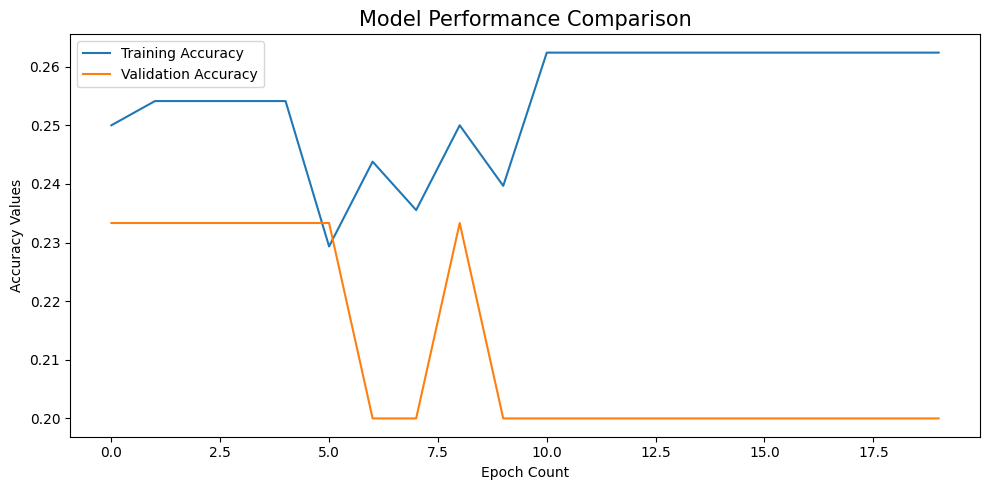

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(score_info_3.history['accuracy'], label='Training Accuracy')
ax.plot(score_info_3.history['val_accuracy'], label='Validation Accuracy')
ax.set_title('Model Performance Comparison', fontsize=15)
ax.set_ylabel('Accuracy Values')
ax.set_xlabel('Epoch Count')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
model = model_creation(kernel_size=(5, 5))

In [ ]:
score_info_5 = model.fit(training_images_files , validation_data=testing_images_files, epochs=20,batch_size=15)

Epoch 1/20
33/33 [==============================] - 5s 109ms/step - loss: 33.4182 - accuracy: 0.2541 - val_loss: 1.4328 - val_accuracy: 0.3000
Epoch 2/20
33/33 [==============================] - 3s 102ms/step - loss: 1.2888 - accuracy: 0.3740 - val_loss: 1.5089 - val_accuracy: 0.2500
Epoch 3/20
33/33 [==============================] - 5s 138ms/step - loss: 1.1606 - accuracy: 0.4938 - val_loss: 1.5366 - val_accuracy: 0.2750
Epoch 4/20
33/33 [==============================] - 5s 155ms/step - loss: 0.9790 - accuracy: 0.5847 - val_loss: 1.5161 - val_accuracy: 0.3500
Epoch 5/20
33/33 [==============================] - 3s 101ms/step - loss: 0.8882 - accuracy: 0.6426 - val_loss: 1.5803 - val_accuracy: 0.3500
Epoch 6/20
33/33 [==============================] - 5s 158ms/step - loss: 0.8189 - accuracy: 0.6860 - val_loss: 1.6353 - val_accuracy: 0.3167
Epoch 7/20
33/33 [==============================] - 4s 100ms/step - loss: 0.7252 - accuracy: 0.7376 - val_loss: 1.8483 - val_accuracy: 0.3250
Epoch

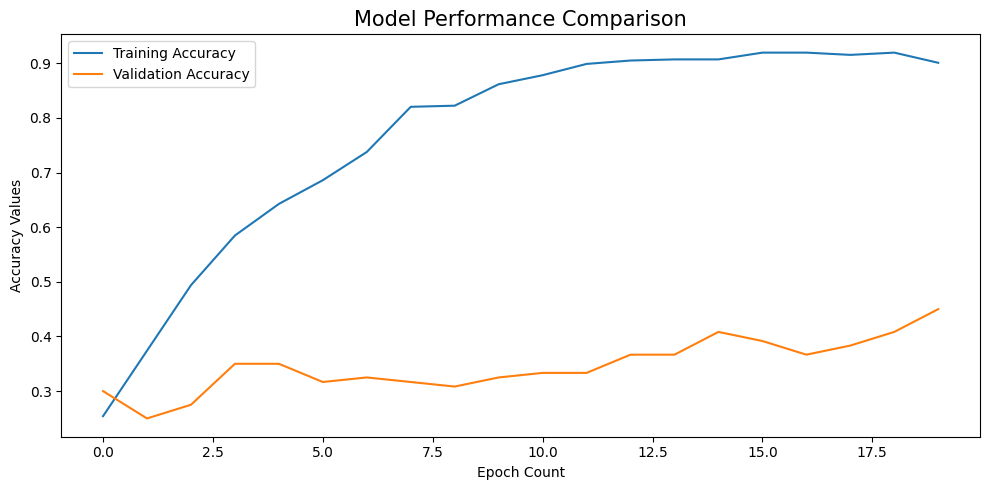

In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(score_info_5.history['accuracy'], label='Training Accuracy')
ax.plot(score_info_5.history['val_accuracy'], label='Validation Accuracy')
ax.set_title('Model Performance Comparison', fontsize=15)
ax.set_ylabel('Accuracy Values')
ax.set_xlabel('Epoch Count')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
model = model_creation(kernel_size=(7, 7))

In [ ]:
score_info_7 = model.fit(training_images_files , validation_data=testing_images_files, epochs=20,batch_size=15)

Epoch 1/20
33/33 [==============================] - 5s 141ms/step - loss: 43.1942 - accuracy: 0.2541 - val_loss: 1.3868 - val_accuracy: 0.2000
Epoch 2/20
33/33 [==============================] - 6s 171ms/step - loss: 1.3848 - accuracy: 0.2624 - val_loss: 1.3873 - val_accuracy: 0.2000
Epoch 3/20
33/33 [==============================] - 4s 129ms/step - loss: 1.3848 - accuracy: 0.2624 - val_loss: 1.3875 - val_accuracy: 0.2000
Epoch 4/20
33/33 [==============================] - 5s 147ms/step - loss: 1.3847 - accuracy: 0.2645 - val_loss: 1.3879 - val_accuracy: 0.2000
Epoch 5/20
33/33 [==============================] - 7s 221ms/step - loss: 1.3846 - accuracy: 0.2645 - val_loss: 1.3885 - val_accuracy: 0.2000
Epoch 6/20
33/33 [==============================] - 5s 137ms/step - loss: 1.3845 - accuracy: 0.2645 - val_loss: 1.3890 - val_accuracy: 0.2000
Epoch 7/20
33/33 [==============================] - 5s 136ms/step - loss: 1.3844 - accuracy: 0.2645 - val_loss: 1.3897 - val_accuracy: 0.2000
Epoch

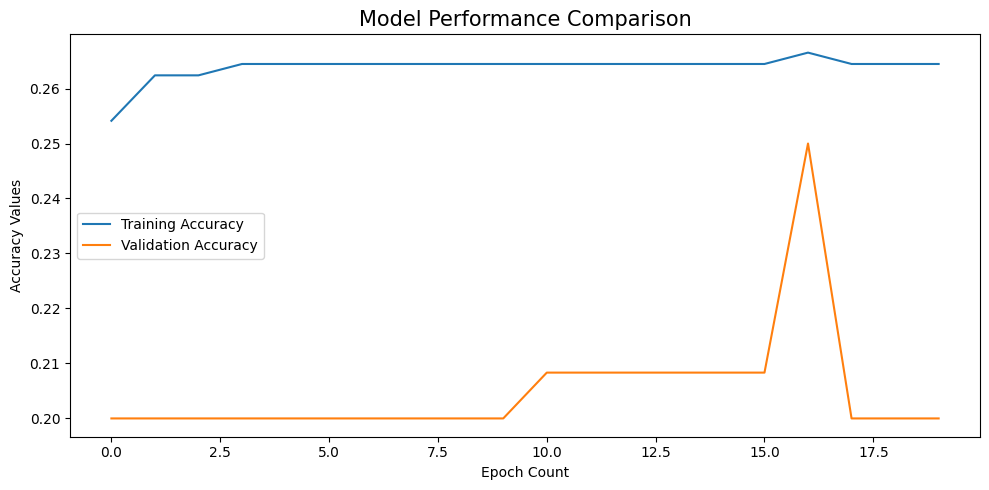

In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(score_info_7.history['accuracy'], label='Training Accuracy')
ax.plot(score_info_7.history['val_accuracy'], label='Validation Accuracy')
ax.set_title('Model Performance Comparison', fontsize=15)
ax.set_ylabel('Accuracy Values')
ax.set_xlabel('Epoch Count')
ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
list_of_scores = {"3*3_validation_accuracy":score_info_3.history['val_accuracy'],
                  "5*5_validation_accuracy":score_info_5.history['val_accuracy'],
                  "7*7_validation_accuracy":score_info_7.history['val_accuracy']}

df = pd.DataFrame(list_of_scores)
df


,3*3_validation_accuracy,5*5_validation_accuracy,7*7_validation_accuracy
0,0.233333,0.300000,0.200000
1,0.233333,0.250000,0.200000
2,0.233333,0.275000,0.200000
3,0.233333,0.350000,0.200000
4,0.233333,0.350000,0.200000
5,0.233333,0.316667,0.200000
6,0.200000,0.325000,0.200000
7,0.200000,0.316667,0.200000
8,0.233333,0.308333,0.200000
9,0.200000,0.325000,0.200000


Upon evaluating the model with several kernel sizes (3 * 3, 5 * 5, and 7 * 7), I found that the kernel size of 5 * 5 had the best validation accuracy. Therefore, out of all the models, the one with a kernel size of 5 * 5 is preferred for my dataset.

**Model Fitting analysis based on training accuracy and validation accuracy**

Models with kernel sizes of 3 * 3, 5 * 5, and 7 * 7 are overfitted because, as the plot above illustrates, training accuracy is higher than validation accuracy.
